<h1> Angle Information </h1> 

Same as in simplenetwork_corr but I use a new dataset where there are slightly different angles (look into stage3_analize_data).

In [1]:
# own skrips
import myfunctions as mf
import helperfile as hf
# generalls libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import uproot
from tensorflow.keras.optimizers import Adam
import time
from scipy.optimize import curve_fit

In [2]:
rootfile = uproot.open('./stage3_clusters_corr_newdata.root')
ipd = hf.InputData(rootfile)
ipd.form_cluster()
ipd.train_test_split()
ipd.prep_trainingsdata()
ipd.prep_verificationdata()

Initialized object
Start shaping clusters in a  (5, 5)  grid...
Shaping the clusters took  138.4346957206726 s
Splitted data into training and test set!
Prepared 'training' data
Prepared 'veri_truth' data
Prepared 'veri_fit' data


In [3]:
num_fit = ipd.num_fit
ind_bad0 = np.where(num_fit == 0)
ind_bad1 = np.where(num_fit == 1)
ind_bad2 = np.where(num_fit == 2)
ind_bad3 = np.where(num_fit == 3)
print("number of 0 coral showers: ", len(ind_bad0[0]))
print("number of 1 coral showers: ", len(ind_bad1[0]))
print("number of 2 coral showers: ", len(ind_bad2[0]))
print("number of 3 coral showers: ", len(ind_bad3[0]))

number of 0 coral showers:  0
number of 1 coral showers:  626674
number of 3 coral showers:  1869
number of 2 coral showers:  5


In [4]:
model = keras.Sequential([layers.Input(shape=(25)),
                         layers.Normalization(mean=3.9, variance=16.2), 
                         layers.Dense(64, activation="relu"),
                         layers.Dense(128, activation="relu"),
                         layers.Dense(256, activation="relu"),
                         layers.Dense(128, activation="relu"),
                         layers.Dense(64, activation="relu"),
                         layers.Dense(32, activation="relu"),
                         layers.Dense(3, activation=None)])
model.summary()
model.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.00001))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 25)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1664      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2

In [5]:
a = time.time()
fit_hist = model.fit(ipd.clusters_t, ipd.training, batch_size=64, epochs=200, validation_split=0.1)
b = time.time()

print("This took ", (b-a)/60, "min")

Epoch 1/200
7072/7072 [==============================] - 7s 897us/step - loss: 431.7156 - val_loss: 16.3512
Epoch 2/200
7072/7072 [==============================] - 6s 881us/step - loss: 10.1911 - val_loss: 7.5044
Epoch 3/200
7072/7072 [==============================] - 6s 885us/step - loss: 6.3231 - val_loss: 5.8473
Epoch 4/200
7072/7072 [==============================] - 6s 887us/step - loss: 5.2453 - val_loss: 5.1529
Epoch 5/200
7072/7072 [==============================] - 6s 888us/step - loss: 4.7443 - val_loss: 4.7552
Epoch 6/200
7072/7072 [==============================] - 6s 890us/step - loss: 4.4469 - val_loss: 4.5357
Epoch 7/200
7072/7072 [==============================] - 6s 890us/step - loss: 4.2648 - val_loss: 4.3835
Epoch 8/200
7072/7072 [==============================] - 6s 889us/step - loss: 4.1371 - val_loss: 4.2756
Epoch 9/200
7072/7072 [==============================] - 6s 889us/step - loss: 4.0488 - val_loss: 4.1963
Epoch 10/200
7072/7072 [===========================

Epoch 155/200
7072/7072 [==============================] - 6s 914us/step - loss: 3.4888 - val_loss: 3.6858
Epoch 156/200
7072/7072 [==============================] - 6s 910us/step - loss: 3.4890 - val_loss: 3.6907
Epoch 157/200
7072/7072 [==============================] - 6s 882us/step - loss: 3.4876 - val_loss: 3.7122
Epoch 158/200
7072/7072 [==============================] - 6s 884us/step - loss: 3.4873 - val_loss: 3.7047
Epoch 159/200
7072/7072 [==============================] - 6s 888us/step - loss: 3.4868 - val_loss: 3.6966
Epoch 160/200
7072/7072 [==============================] - 6s 886us/step - loss: 3.4851 - val_loss: 3.7053
Epoch 161/200
7072/7072 [==============================] - 6s 886us/step - loss: 3.4833 - val_loss: 3.7501
Epoch 162/200
7072/7072 [==============================] - 6s 883us/step - loss: 3.4831 - val_loss: 3.7622
Epoch 163/200
7072/7072 [==============================] - 6s 880us/step - loss: 3.4818 - val_loss: 3.6823
Epoch 164/200
7072/7072 [============

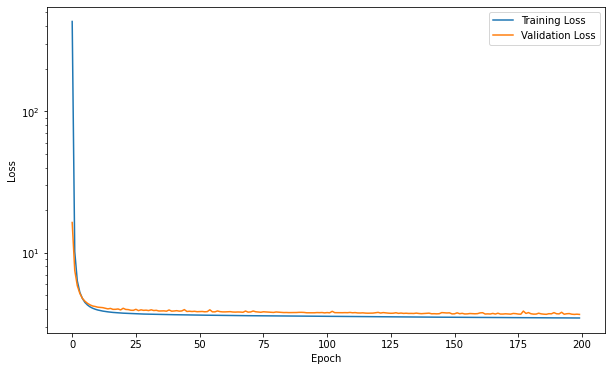

In [6]:
plt.rcParams["figure.figsize"] = (10,6)
mf.training_vs_validation_loss(fit_hist)

In [7]:
output = model.predict(ipd.clusters_v)

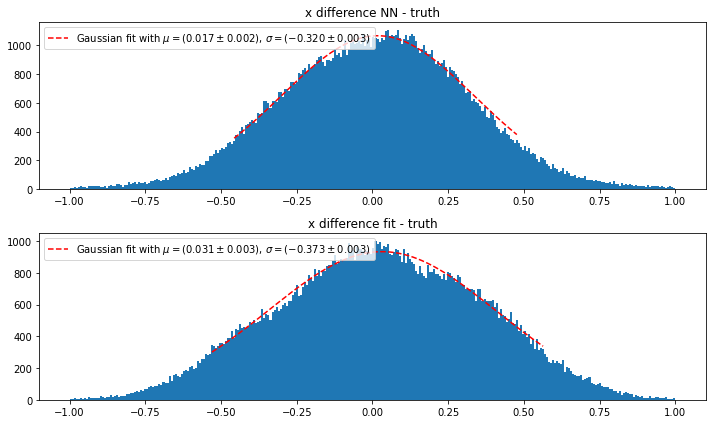

(array([ 1.74265878e-02, -3.19522629e-01,  8.55020007e+02]),
 array([2.04831338e-03, 2.90556081e-03, 6.18755325e+00]),
 array([ 3.14518854e-02, -3.73078158e-01,  8.73900140e+02]),
 array([2.50007670e-03, 3.49120271e-03, 6.53248271e+00]))

In [15]:
mf.histo_output(output.T[0], ipd.veri_fit.T[0], ipd.veri_truth.T[0], name="x", fit=True)

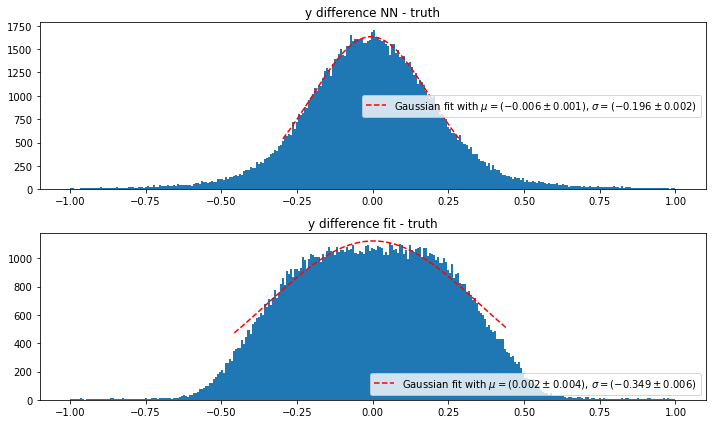

(array([-5.61590975e-03, -1.95657126e-01,  8.00778212e+02]),
 array([1.12112374e-03, 1.55420447e-03, 5.07558920e+00]),
 array([ 1.90240960e-03, -3.48993734e-01,  9.82253393e+02]),
 array([3.60836947e-03, 5.75239045e-03, 1.28095452e+01]))

In [16]:
mf.histo_output(output.T[1], ipd.veri_fit.T[1], ipd.veri_truth.T[1], name="y")

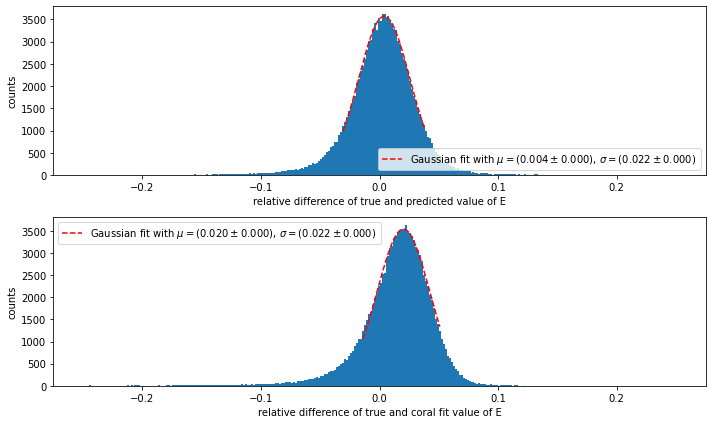

In [11]:
E_bad = mf.histo_output_relE(output.T[2], ipd.veri_fit.T[2], ipd.veri_truth.T[2], name="E", range_x=(-0.25,0.25), fit=True)

In [12]:
keras.models.save_model(model, 'stage3model_truely_correct_newdata')

INFO:tensorflow:Assets written to: stage3model_truely_correct_newdata/assets


In [33]:
def histo_output_relxy(xy_NN, xy_truth, E_truth, theta_z_v, name='', range_x = (-0.25,0.25), bins=300, num_sig=1):
    '''similar to histo_output but written for x/y to display relative difference and return values that are more than "num_sig" times sigma away and their corresponding engery'''
    
    plt.rcParams["figure.figsize"] = (10,6)
    plt.subplot(1,1,1)
    n_counts, bins, patches = plt.hist((xy_NN-xy_truth)/xy_truth, bins=bins, range=range_x)
    
    # fit
    maxv = n_counts.max()
    ind_fit = np.where(n_counts > 0.3*maxv)
    liml = ind_fit[0].min()
    limu = ind_fit[0].max() + 1

    x_centers = 0.5*(bins[:-1]+bins[1:])
    popt1, pcov1 = curve_fit(gaus, x_centers[liml:limu], n_counts[liml:limu], p0=[0,1, 100], sigma=1/np.sqrt(n_counts)[liml:limu], maxfev=10000)
    perr1 = np.sqrt(np.diag(pcov1))
    x_fit = np.linspace(x_centers[liml:limu][0], x_centers[liml:limu][-1], 500)
    y_fit = gaus(x_fit, *popt1)
    plt.plot(x_fit, y_fit, 'r--', label="Gaussian fit with " + r"$\mu = ({:.3f} \pm {:.3f})$".format(popt1[0], perr1[0]) + ", " + r"$\sigma = ({:.3f} \pm {:.3f})$".format(popt1[1], perr1[1]))
    plt.legend()
    plt.xlabel("relative difference of true and predicted value of " + name)
    plt.ylabel("counts")

    # which values does NN not learn correctly (energy)?
    ind_bad = np.where(abs((xy_NN-xy_truth)/xy_truth) > num_sig * popt1[1]) # all events further away than 1 sigma
    values_bad_xy = xy_truth[ind_bad]
    E_bad = E_truth[ind_bad]
    theta_bad = theta_z_v[ind_bad]
    
    plt.tight_layout()
    plt.show()
    
    return values_bad_xy, E_bad, theta_bad # return values that are more than 1 (num_sig) sigma away

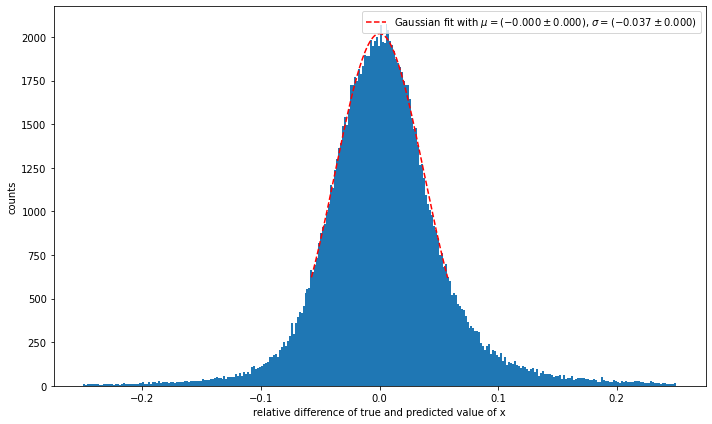

In [35]:
x_bad, Ex_bad, theta_z_xbad = histo_output_relxy(output.T[0], ipd.veri_truth.T[0], ipd.veri_truth.T[2], theta_z_v,name='x')

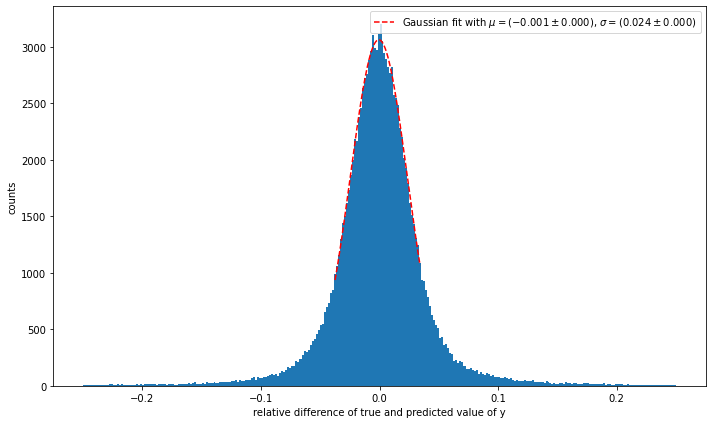

In [34]:
y_bad, Ey_bad, theta_z_ybad = histo_output_relxy(output.T[1], ipd.veri_truth.T[1], ipd.veri_truth.T[2], theta_z_v, name='y')

<h2> Summary </h2>

| (x/y/rel E) | $\mu$ | $\sigma$ |
| --- | --- | --- |
| simple model stage 3 dataset 1| 0.023 / 0.00029 / 0.004 | 0.176 / 0.161 / 0.022 |
| simple model stage 3 dataset 2 | 0.017 / 0.006 / 0.004 | 0.320 / 0.196 / 0.022 |

Why it this so much worse??

<h3> Look at data... </h3>

In [18]:
theta_x = np.arccos(ipd.momentum.T[0]/ (np.linalg.norm(ipd.momentum, axis=1)))
theta_y = np.arccos(ipd.momentum.T[1]/ (np.linalg.norm(ipd.momentum, axis=1)))
theta_z = np.arccos(ipd.momentum.T[2]/ (np.linalg.norm(ipd.momentum, axis=1)))

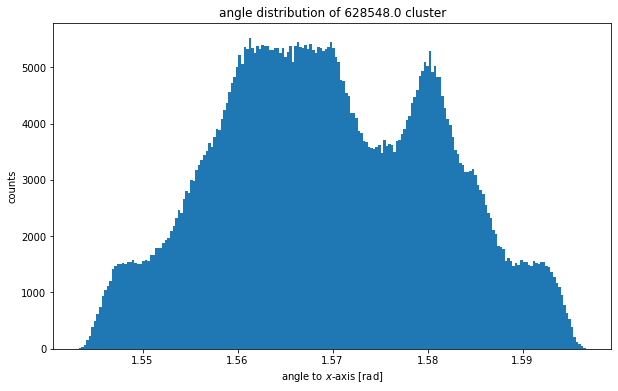

In [19]:
n, _, _ = plt.hist(theta_x, bins=200)
plt.xlabel('angle to $x$-axis [rad]')
plt.ylabel('counts')
plt.title('angle distribution of ' + str(np.sum(n)) + ' cluster')
plt.show()

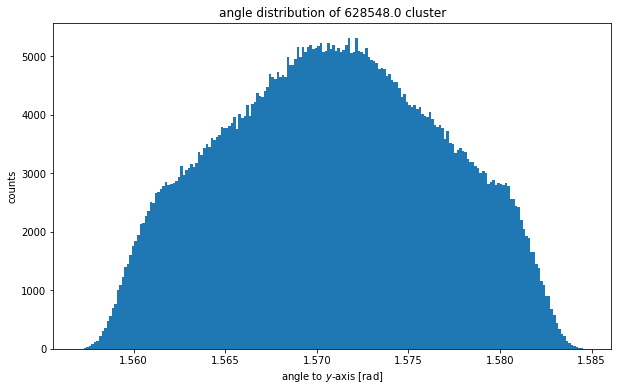

In [21]:
n, _, _ = plt.hist(theta_y, bins=200)
plt.xlabel('angle to $y$-axis [rad]')
plt.ylabel('counts')
plt.title('angle distribution of ' + str(np.sum(n)) + ' cluster')
plt.show()

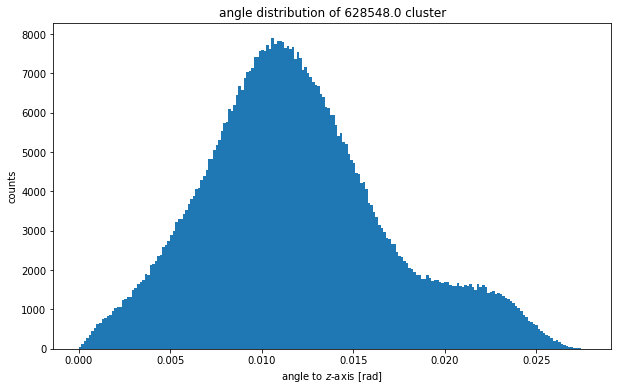

In [23]:
n, _, _ = plt.hist(theta_z, bins=200)
plt.xlabel('angle to $z$-axis [rad]')
plt.ylabel('counts')
plt.title('angle distribution of ' + str(np.sum(n)) + ' cluster')
plt.show()

Ok and what about trainings and validation split?


In [24]:
theta_x_t = np.arccos(ipd.momentum_t.T[0]/ (np.linalg.norm(ipd.momentum_t, axis=1)))
theta_y_t = np.arccos(ipd.momentum_t.T[1]/ (np.linalg.norm(ipd.momentum_t, axis=1)))
theta_z_t = np.arccos(ipd.momentum_t.T[2]/ (np.linalg.norm(ipd.momentum_t, axis=1)))
theta_x_v = np.arccos(ipd.momentum_v.T[0]/ (np.linalg.norm(ipd.momentum_v, axis=1)))
theta_y_v = np.arccos(ipd.momentum_v.T[1]/ (np.linalg.norm(ipd.momentum_v, axis=1)))
theta_z_v = np.arccos(ipd.momentum_v.T[2]/ (np.linalg.norm(ipd.momentum_v, axis=1)))

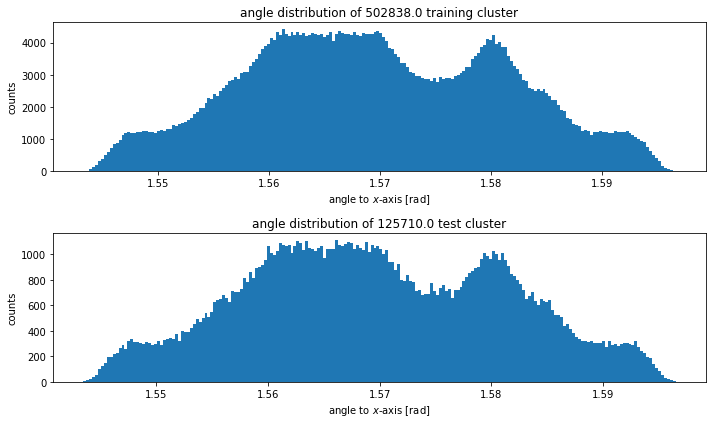

In [28]:
plt.subplot(2,1,1)
n, _, _ = plt.hist(theta_x_t, bins=200)
plt.xlabel('angle to $x$-axis [rad]')
plt.ylabel('counts')
plt.title('angle distribution of ' + str(np.sum(n)) + ' training cluster')
plt.subplot(2,1,2)
n, _, _ = plt.hist(theta_x_v, bins=200)
plt.xlabel('angle to $x$-axis [rad]')
plt.ylabel('counts')
plt.title('angle distribution of ' + str(np.sum(n)) + ' test cluster')
plt.tight_layout()
plt.show()

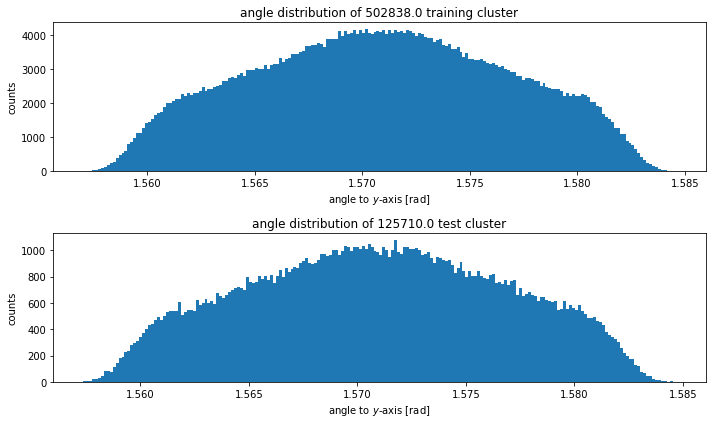

In [29]:
plt.subplot(2,1,1)
n, _, _ = plt.hist(theta_y_t, bins=200)
plt.xlabel('angle to $y$-axis [rad]')
plt.ylabel('counts')
plt.title('angle distribution of ' + str(np.sum(n)) + ' training cluster')
plt.subplot(2,1,2)
n, _, _ = plt.hist(theta_y_v, bins=200)
plt.xlabel('angle to $y$-axis [rad]')
plt.ylabel('counts')
plt.title('angle distribution of ' + str(np.sum(n)) + ' test cluster')
plt.tight_layout()
plt.show()

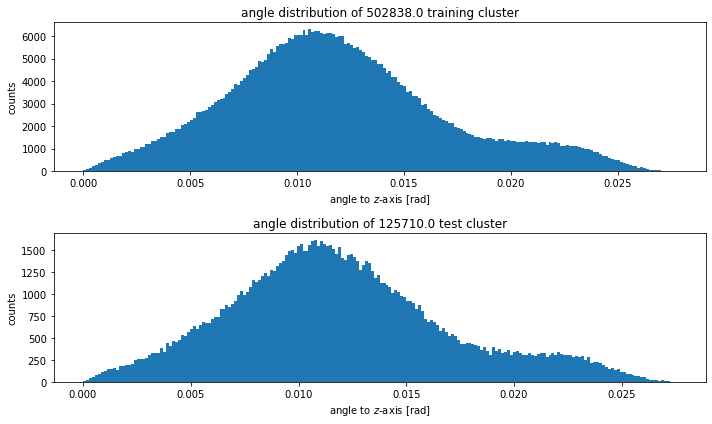

In [30]:
plt.subplot(2,1,1)
n, _, _ = plt.hist(theta_z_t, bins=200)
plt.xlabel('angle to $z$-axis [rad]')
plt.ylabel('counts')
plt.title('angle distribution of ' + str(np.sum(n)) + ' training cluster')
plt.subplot(2,1,2)
n, _, _ = plt.hist(theta_z_v, bins=200)
plt.xlabel('angle to $z$-axis [rad]')
plt.ylabel('counts')
plt.title('angle distribution of ' + str(np.sum(n)) + ' test cluster')
plt.tight_layout()
plt.show()

<h2>Which data does the network not learnt correctly?


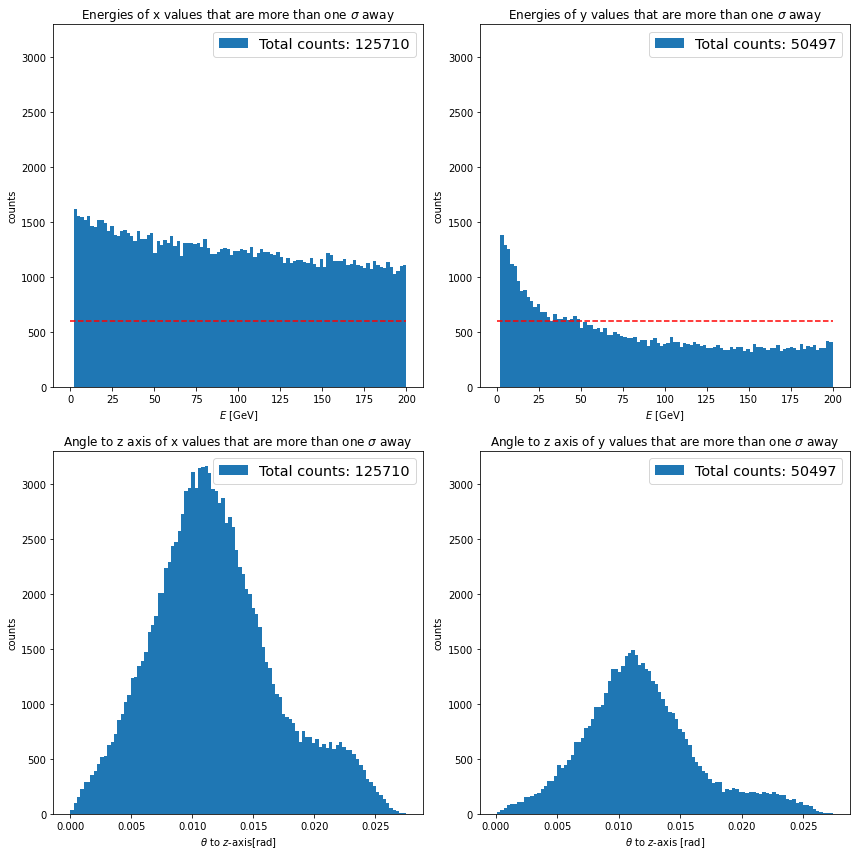

In [43]:
plt.rcParams["figure.figsize"] = (12,12)

ylim = 3300

plt.subplot(2,2,1)
plt.hist(Ex_bad, bins=100, label="Total counts: "+ str(len(Ex_bad)))
plt.legend(fontsize="x-large")
plt.title("Energies of x values that are more than one $\sigma$ away ")
plt.xlabel("$E$ [GeV]")
plt.ylabel("counts")
plt.hlines(600, 0, 200, 'r', linestyles="dashed")
plt.ylim(0, ylim)

plt.subplot(2,2,2)
plt.hist(Ey_bad, bins=100, label="Total counts: "+ str(len(Ey_bad)))
plt.legend(fontsize="x-large")
plt.title("Energies of y values that are more than one $\sigma$ away ")
plt.xlabel("$E$ [GeV]")
plt.ylabel("counts")
plt.hlines(600, 0, 200, 'r', linestyles="dashed")
plt.ylim(0, ylim)

plt.subplot(2,2,3)
plt.hist(theta_z_xbad, bins=100, label="Total counts: "+ str(len(theta_z_xbad)))
plt.legend(fontsize="x-large")
plt.title("Angle to z axis of x values that are more than one $\sigma$ away ")
plt.xlabel(r"$\theta$ to $z$-axis[rad]")
plt.ylabel("counts")
#plt.hlines(600, 0, 200, 'r', linestyles="dashed")
plt.ylim(0, ylim)

plt.subplot(2,2,4)
plt.hist(theta_z_ybad, bins=100, label="Total counts: "+ str(len(theta_z_ybad)))
plt.legend(fontsize="x-large")
plt.title("Angle to z axis of y values that are more than one $\sigma$ away ")
plt.xlabel(r"$\theta$ to $z$-axis [rad]")
plt.ylabel("counts")
#plt.hlines(600, 0, 200, 'r', linestyles="dashed")
plt.ylim(0, ylim)

plt.tight_layout()
plt.show()

Anmerkung: Ich muesste erst jeden bin gewichten mit anzahl an Eintraegen generell...